In [21]:
using AsyPlots
using Random; Random.seed!(123);
using Flux
using Flux: onecold, onehotbatch, crossentropy, params, throttle
using Base.Iterators: repeated
using Contour

In [22]:
model = Chain(Dense(2,20,sigmoid), Dense(20, 10), Dense(10, 2), softmax)
loss(x,y) = crossentropy(model(x), y)
accuracy(x, y) = mean(onecold(model(x)) .== onecold(y))

accuracy (generic function with 1 method)

In [23]:
function gensample(k)
    r(t) = 1-2t/3
    f1(t) = [-1/2 + r(t)*cos(k*π*t), r(t)*sin(k*π*t)]
    f2(t) = [-1/2 - r(t)*cos(k*π*t), -r(t)*sin(k*π*t)]
    if rand(Bool)
        f1(rand()) + 0.2*randn(2), 0
    else
        f2(rand()) + 0.2*randn(2), 1
    end
end

gensample (generic function with 1 method)

In [24]:
n = 250
X = zeros(2,n)
Y = zeros(n)
for i=1:n
    X[:,i] , Y[i] = gensample(1.5)
end
Y = onehotbatch(Y, 0:1); 

In [25]:
dataset = repeated((X,Y), 60_000)
opt = ADAM()
evalcb = () -> @show(loss(X, Y))
Flux.train!(loss, params(model), dataset, opt, cb = throttle(evalcb, 10))

loss(X, Y) = 1.1503193f0 (tracked)
loss(X, Y) = 0.20958938f0 (tracked)
loss(X, Y) = 0.18990438f0 (tracked)
loss(X, Y) = 0.1660373f0 (tracked)


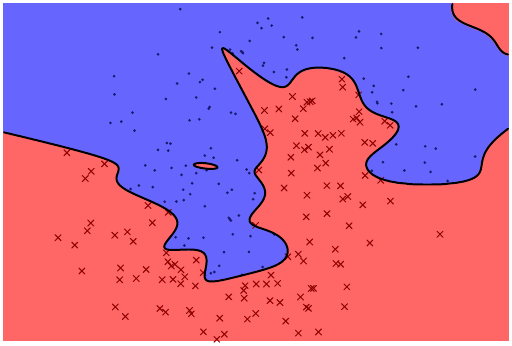

In [26]:
xs = -2:1/2^7:1
ys = -1:1/2^7:1
m = model(X)
zs = [Float64(model([x,y])[1].data) for x=xs,y=ys]
paths = GraphicElement[]
for line in lines(levels(contours(xs,ys,zs,[0.5]))[1])
    xpath,ypath = coordinates(line)
    push!(paths,Path(xpath,ypath;linewidth=2))
end
inbox(v) = first(xs) ≤ v[1] ≤ last(xs) && first(ys) ≤ v[2] ≤ last(ys)
overfit = Plot(heatmap([model([x,y])[1] < 0.5 for x=xs,y=ys],(-2,-1),(1,1);
            alpha=[0.6 for x=xs,y=ys],
            smooth=true,
            colors=NamedColor.(["blue","red"]));width=512) + 
    PointCloud([tuple(X[:,k]...) for k=1:n if m[1,k] > 0.5 && inbox(X[:,k])],shape=:dot,color="MidnightBlue") + 
    PointCloud([tuple(X[:,k]...) for k=1:n if m[1,k] ≤ 0.5 && inbox(X[:,k])],shape=:cross,linewidth=1,color="DarkRed") +
    Plot(paths) + Point(-0.6,0.6,shape=:cross,linewidth=1,color="DarkRed")

In [27]:
save("nn-overfit.pdf",overfit)

"nn-overfit.pdf"

In [28]:
model2 = Chain(Dense(2,4,sigmoid), Dense(4, 2), softmax)
loss2(x,y) = crossentropy(model2(x), y)
accuracy2(x, y) = mean(onecold(model2(x)) .== onecold(y))

accuracy2 (generic function with 1 method)

In [29]:
dataset = repeated((X,Y), 20_000)
opt = ADAM()
evalcb = () -> @show(loss2(X, Y))
Flux.train!(loss2, params(model2), dataset, opt, cb = throttle(evalcb, 10))

loss2(X, Y) = 0.7363795f0 (tracked)


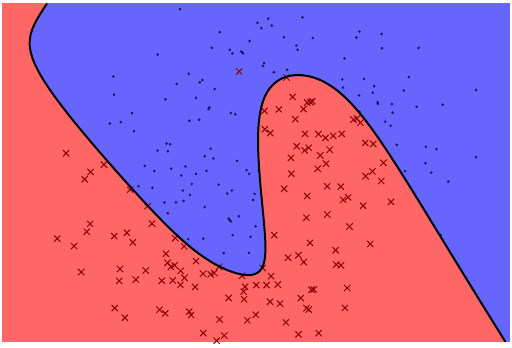

In [30]:
xs = -2:1/2^7:1
ys = -1:1/2^7:1
m = model2(X)
zs = [Float64(model2([x,y])[1].data) for x=xs,y=ys]
paths = GraphicElement[]
for line in lines(levels(contours(xs,ys,zs,[0.5]))[1])
    xpath,ypath = coordinates(line)
    push!(paths,Path(xpath,ypath;linewidth=2))
end
inbox(v) = first(xs) ≤ v[1] ≤ last(xs) && first(ys) ≤ v[2] ≤ last(ys)
justright = Plot(heatmap([model2([x,y])[1] < 0.5 for x=xs,y=ys],(-2,-1),(1,1);
            alpha=[0.6 for x=xs,y=ys],
            smooth=true,
            colors=NamedColor.(["blue","red"]));width=512) + 
    PointCloud([tuple(X[:,k]...) for k=1:n if m[1,k] > 0.5 && inbox(X[:,k])],shape=:dot,color="MidnightBlue") + 
    PointCloud([tuple(X[:,k]...) for k=1:n if m[1,k] ≤ 0.5 && inbox(X[:,k])],shape=:cross,linewidth=1,color="DarkRed") +
    Plot(paths) + Point(-0.6,0.6,shape=:cross,linewidth=1,color="DarkRed")

In [31]:
save("nn-justright.pdf",justright)

"nn-justright.pdf"